In [2]:

# #Question: Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks
# before investing in them.  Given two stocks, find out which stock is at lesser risk by looking into measures of dispersion 
# of stocks values. Also implement the 12 sub task given in today’s class for the same problem

In [5]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [8]:
# In the extract step, we're reading data from the CSV file named "BEML.csv" using the pd.read_csv() function from the Pandas library. 
# This function reads the data and stores it in a DataFrame named beml_df. The print(beml_df[:5]) statement displays the first 5 rows of 
# the DataFrame, giving us a glimpse of the data we've just extracted.

In [7]:
bemldata=pd.read_csv("BEML.csv")
bemldata

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [ ]:
# In the extract step, we're reading  second stock data from the CSV file named "GLAXO.csv" using the pd.read_csv() function from the Pandas library. 
# This function reads the data and stores it in a DataFrame named beml_df. The print(glaxodata.head(5)) statement displays the first 5 rows of 
# the DataFrame, giving us a glimpse of the data we've just extracted.

In [8]:
glaxodata=pd.read_csv("GLAXO.csv")
glaxodata.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [ ]:
# in second step , we selecting the feature vector from both stock data  

In [9]:
#selecting one feature vector
bemldata=bemldata[['Date','Close',]]
glaxodata=glaxodata[['Date','Close']]

In [10]:
# Coverting time to index
glaxo=glaxodata.set_index(pd.DatetimeIndex(glaxodata['Date']))
beml=bemldata.set_index(pd.DatetimeIndex(bemldata['Date']))
bemldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1739 non-null   object 
 1   Close   1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.3+ KB


In [11]:
#mean.mode,median beml dataset
# for calculating mean use np.mean() function   
# for calculating median use np.median() function 
#for calculating mode use stats.mode() function
#  print mean ,median and mode
Bmean=np.mean(bemldata['Close'])
Bmedian=np.median(bemldata['Close'])
Bmode=stat.mode(bemldata['Close'])
print(f"Mean={Bmean}\nMedian={ Bmedian} \nmode={Bmode}")

Mean=698.4352213916044
Median=682.15 
mode=887.7


In [12]:
#mean.mode,median Glaxo dataset

# for calculating mean use np.mean() function   
# for calculating median use np.median() function 
#for calculating mode use stats.mode() function
#  print mean ,median and mode

Gmean=np.mean(glaxodata['Close'])
Gmedian=np.median(glaxodata['Close'])
Gmode=stat.mode(glaxodata['Close'])
print(f"Mean={Gmean}\nMedian={ Gmedian} \nmode={Gmode}")

Mean=2532.631742380678
Median=2364.7 
mode=1916.8


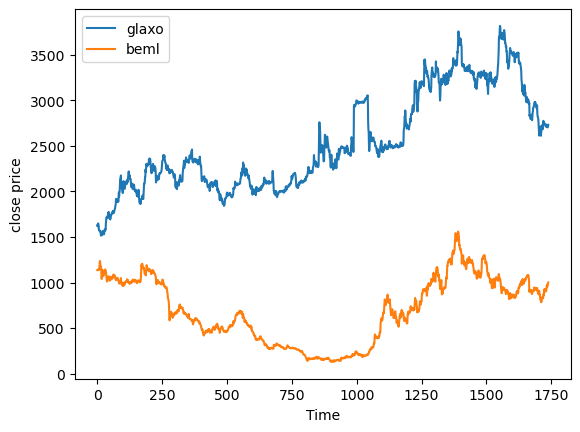

In [29]:
# make time plot graph both the stocks
# for plotting graph use the plt.plot() function  and set label of  both axis  use plt.xlabel() and plt.ylabel()

figsize=(10,5)
plt.plot(glaxodata.Close,label="glaxo")
plt.xlabel('Time')
plt.ylabel("close price")

#plt.subplots(figsize=(10,5))
plt.plot(bemldata.Close,label="beml")
plt.xlabel('Time')
plt.ylabel("close price")
plt.legend()


In [13]:
# Cosidering close value of stock as gain
# calculating gain of both stock use [df.Close.pct_change(periods=1)]
glaxodata['gain']=glaxodata.Close.pct_change(periods=1)
bemldata['gain']=bemldata.Close.pct_change(periods=1)
print("glaxo gain=\n",glaxodata.head(5))
print()
print("beml gain=\n",bemldata.head(5))

glaxo gain=
          Date    Close      gain
0  2010-01-04  1625.65       NaN
1  2010-01-05  1616.80 -0.005444
2  2010-01-06  1638.50  0.013422
3  2010-01-07  1648.70  0.006225
4  2010-01-08  1639.80 -0.005398

beml gain=
          Date    Close      gain
0  2010-01-04  1135.60       NaN
1  2010-01-05  1134.60 -0.000881
2  2010-01-06  1139.60  0.004407
3  2010-01-07  1144.15  0.003993
4  2010-01-08  1144.05 -0.000087


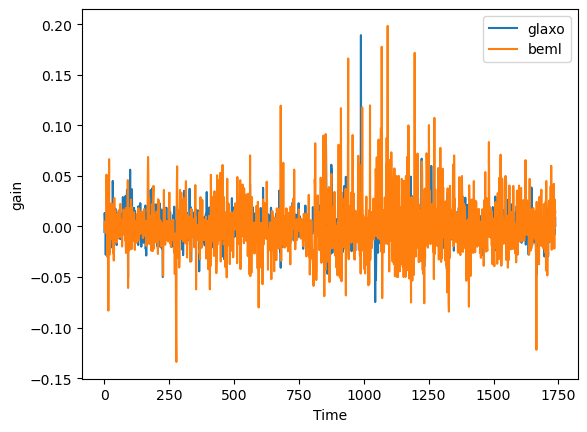

In [14]:
#plot gain and time
# for plotting gain graph use the plt.plot() function and set label of both axis use plt.xlabel() and plt.ylabel()

figsize=(10,5)
plt.plot(glaxodata.gain,label="glaxo")
plt.xlabel('Time')
plt.ylabel("gain")

#plt.subplots(figsize=(10,5))
plt.plot(bemldata.gain,label="beml")
plt.xlabel('Time')
plt.ylabel("gain")
plt.legend()


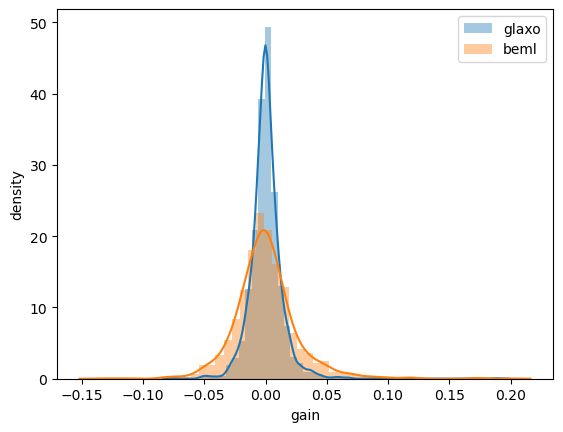

In [15]:
#plot distribution plot
# use distplot.plt() funtion for ploting distribution of both stock  gain 
# for plotting graph use the sns.distplot() function  and set label of  both axis  use plt.xlabel() and plt.ylabel()

sn.distplot(glaxodata.gain,label="glaxo")
sn.distplot(bemldata.gain,label="beml")
plt.xlabel("gain")
plt.ylabel("density")
plt.legend()

In [16]:
## print daily gain of glaxodata 
print("daily gain of glaso")
print("Mean: ", round(glaxodata.gain.mean(),4))
print("standard derivation:" ,round(glaxodata.gain.std(),4))

daily gain of glaso
Mean:  0.0004
standard derivation: 0.0134


In [17]:
## print daily gain of bemldata
print("daily gain of beml")
print("Mean: ", round(bemldata.gain.mean(),4))
print("standard derivation:" ,round(bemldata.gain.std(),4))
      

daily gain of beml
Mean:  0.0003
standard derivation: 0.0264


In [18]:
## describe and  risk of stack
print("beml stock")
bemldata.gain.describe()


beml stock


count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

In [19]:
## describe and  risk of stack
print("glaxo stock")
glaxodata.gain.describe()

glaxo stock


count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: gain, dtype: float64

In [20]:
## beml stock has higher risk as standard derivation of beml is 2.64% 
##whereas the standard derivation of glaxo ix 1.33%